In [26]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2672 - accuracy: 0.9217
Epoch 2/3
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1078 - accuracy: 0.9666
Epoch 3/3
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0741 - accuracy: 0.9766


In [27]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 2s 165us/sample - loss: 0.0925 - accuracy: 0.9707
0.09252538843369111
0.9707


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [17]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [18]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [21]:
predictions = new_model.predict(x_test)

In [22]:
print(predictions)

[[3.5713419e-09 2.0966914e-08 3.8563157e-05 ... 9.9994338e-01
  1.4988094e-08 3.4497711e-07]
 [1.4677805e-08 3.8395425e-05 9.9994349e-01 ... 2.5355831e-09
  1.4510532e-07 3.3245264e-11]
 [1.3075010e-07 9.9908447e-01 1.3230191e-04 ... 3.2101767e-04
  1.8236431e-04 4.3964715e-07]
 ...
 [7.0124795e-10 1.5562452e-07 3.1200745e-08 ... 3.3891407e-05
  3.7976119e-07 7.6315719e-06]
 [2.4994287e-07 7.5493278e-07 1.6001074e-07 ... 2.6780597e-06
  7.3077994e-05 2.1491989e-08]
 [1.7265683e-07 4.3191775e-09 9.4998398e-07 ... 6.3604905e-10
  7.2349167e-09 1.5037516e-10]]


In [24]:
import numpy as np
print(np.argmax(predictions[0]))

7


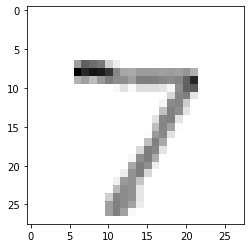

In [25]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()